## Decision Tree 

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix 

### Prepare data

In [2]:
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

Survived = ['Not survived','Survived']

### Train model

#### Optimize the Decision Tree  Model

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
dt = DecisionTreeClassifier()
parameters = {
    'max_leaf_nodes': range(6,45,2),
    'criterion': ['entropy','gini']
}

cv = GridSearchCV(dt, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

best_dt=cv.best_estimator_

BEST PARAMS: {'criterion': 'entropy', 'max_leaf_nodes': 6}

0.831 (+/-0.028) for {'criterion': 'entropy', 'max_leaf_nodes': 6}
0.82 (+/-0.047) for {'criterion': 'entropy', 'max_leaf_nodes': 8}
0.815 (+/-0.047) for {'criterion': 'entropy', 'max_leaf_nodes': 10}
0.823 (+/-0.043) for {'criterion': 'entropy', 'max_leaf_nodes': 12}
0.82 (+/-0.04) for {'criterion': 'entropy', 'max_leaf_nodes': 14}
0.82 (+/-0.04) for {'criterion': 'entropy', 'max_leaf_nodes': 16}
0.819 (+/-0.043) for {'criterion': 'entropy', 'max_leaf_nodes': 18}
0.819 (+/-0.04) for {'criterion': 'entropy', 'max_leaf_nodes': 20}
0.817 (+/-0.043) for {'criterion': 'entropy', 'max_leaf_nodes': 22}
0.815 (+/-0.044) for {'criterion': 'entropy', 'max_leaf_nodes': 24}
0.812 (+/-0.034) for {'criterion': 'entropy', 'max_leaf_nodes': 26}
0.81 (+/-0.026) for {'criterion': 'entropy', 'max_leaf_nodes': 28}
0.805 (+/-0.028) for {'criterion': 'entropy', 'max_leaf_nodes': 30}
0.809 (+/-0.023) for {'criterion': 'entropy', 'max_leaf_nodes': 3

## Test Model

#### Visualize the Confusion Matrix

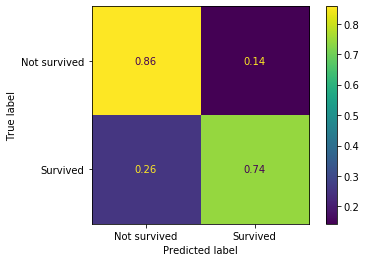

In [4]:
plot_confusion_matrix(
    best_dt, test_features, test_labels,
    display_labels=Survived,
    normalize='true')

#### Caluate the accuracy of the test data

In [5]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_dt.score(test_features, test_labels))))

Accuracy on testing data: 81.01%


### Display the Decision Tree

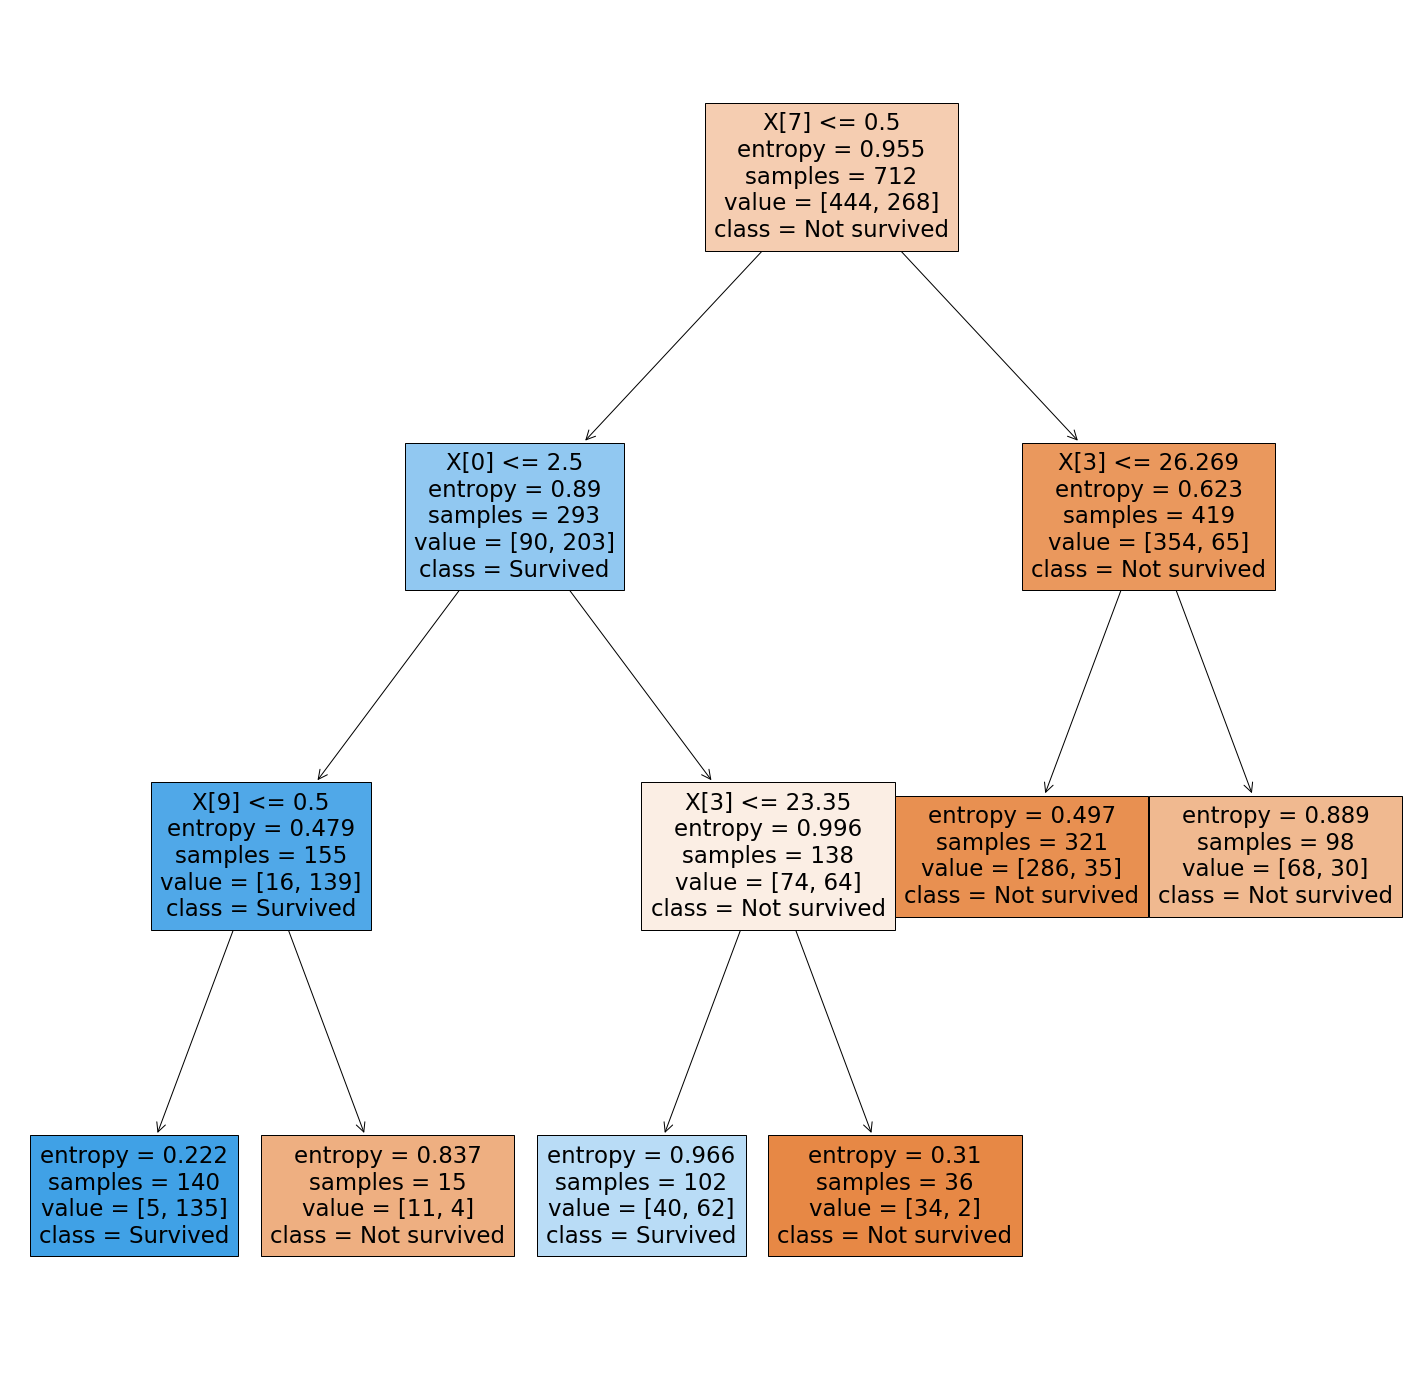

In [6]:
# Sets the figure size
fig = plt.figure(figsize=(25, 25))

# Creates a visual display of the model.
# Keep max_depth small for better visualization 
t = plot_tree(
    best_dt,
    class_names=Survived,
    max_depth=3,
    filled=True)